In [1]:
from joblib import dump, load

In [2]:
x_train = load('x_train_maccs.pkl')
x_test = load('x_test_maccs.pkl')
x_valid = load('x_valid_maccs.pkl')

In [3]:
y_train = load('y_train.pkl')
y_test = load('y_test.pkl')
y_valid = load('y_valid.pkl')

In [4]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [5]:
seed = 42

In [6]:
cv = StratifiedKFold(n_splits=10, random_state=seed)

D:\Anaconda3\envs\deepchem\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler().fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_valid_scaled = scale.transform(x_valid)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [83]:
param_grid = {'p': np.arange(1, 11, 1)}

In [84]:
knn = GridSearchCV(KNeighborsClassifier(n_neighbors=4, weights='distance'), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

In [85]:
knn.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=-1,
             param_grid={'p': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [86]:
knn.best_params_

{'p': 2}

In [87]:
knn.best_score_

0.7588235294117647

In [91]:
knn_2c8 = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [92]:
knn_2c8.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [96]:
knn_2c8.score(x_train_scaled, y_train)

0.9970588235294118

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_auc_score, make_scorer, recall_score

In [19]:
matthews = make_scorer(matthews_corrcoef)
specificity = make_scorer(recall_score, pos_label=0)

In [93]:
cross_val_score(knn_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean()

0.7588235294117647

In [71]:
cross_val_score(knn_2c8, x_train_scaled, y_train, cv=cv, scoring='roc_auc').mean()

0.8238753132832081

In [72]:
cross_val_score(knn_2c8, x_train_scaled, y_train, cv=cv, scoring=matthews).mean()

0.5107386752984687

In [73]:
cross_val_score(knn_2c8, x_train_scaled, y_train, cv=cv, scoring='recall').mean()

0.7928947368421053

In [74]:
cross_val_score(knn_2c8, x_train_scaled, y_train, cv=cv, scoring=specificity).mean()

0.7095238095238096

In [75]:
y_pred = knn_2c8.predict(x_test_scaled)

In [76]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [77]:
accuracy_score(y_test, y_pred)

0.7570093457943925

In [78]:
roc_auc_score(y_test, knn_2c8.predict_proba(x_test_scaled)[:,1])

0.7947154471544715

In [79]:
matthews_corrcoef(y_test, y_pred)

0.49678291743266006

In [80]:
recall_score(y_test, y_pred)

0.7727272727272727

In [81]:
recall_score(y_test, y_pred, pos_label=0)

0.7317073170731707

In [82]:
import matplotlib.pyplot as plt

0.7735294117647058 1
0.7570093457943925 4


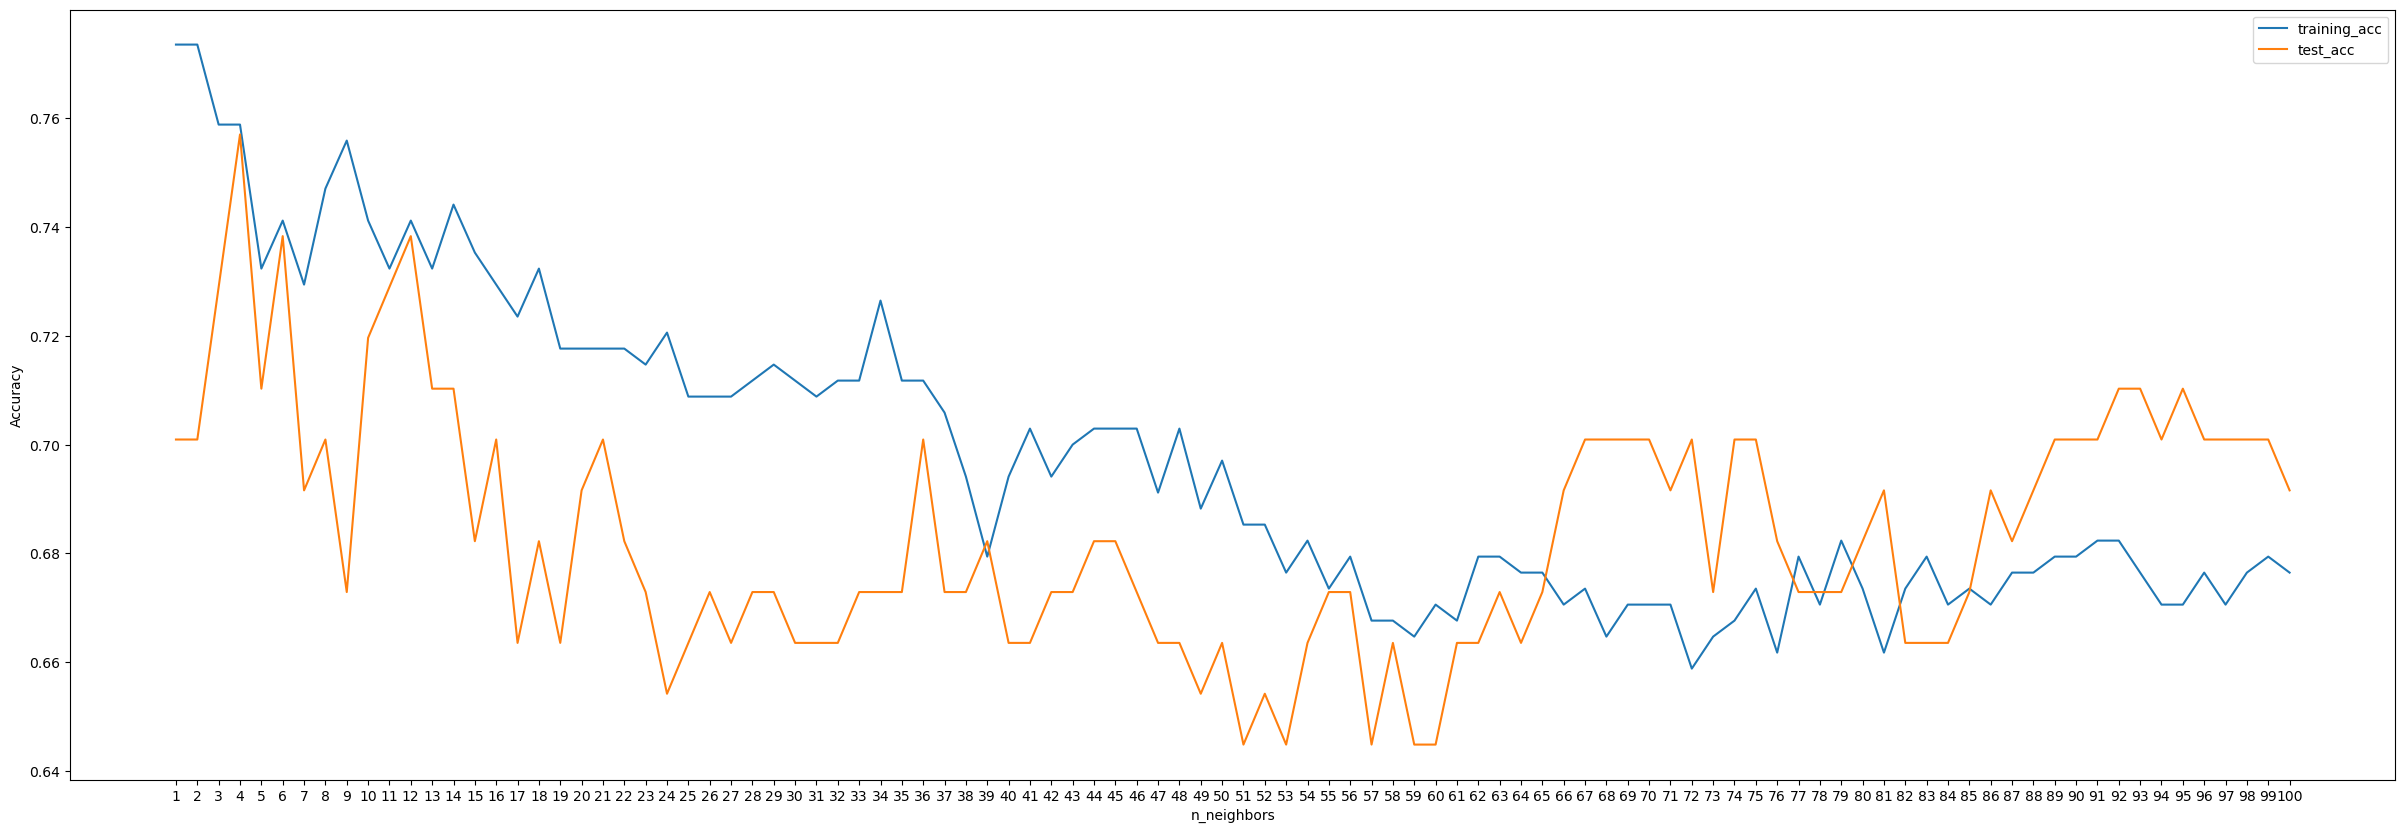

In [67]:
training_acc = []
test_acc = []

for i in np.arange(1, 101, 1):
    knn_2c8 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn_2c8.fit(x_train_scaled, y_train)
    training_acc.append(cross_val_score(knn_2c8, x_train_scaled, y_train, cv=cv, scoring='accuracy').mean())
    y_pred = knn_2c8.predict(x_test_scaled)
    test_acc.append(accuracy_score(y_test, y_pred))
print(max(training_acc),(training_acc.index(max(training_acc)))+1) # index starts from 0
print(max(test_acc),(test_acc.index(max(test_acc)))+1)
plt.figure(figsize=(30, 10))
plt.plot(np.arange(1, 101, 1), training_acc, label="training_acc")
plt.plot(np.arange(1, 101, 1), test_acc, label="test_acc")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
xticks = np.arange(1, 101, 1)
plt.xticks(xticks)
plt.legend()

In [97]:
y_pred_valid = knn_2c8.predict(x_valid_scaled)

In [98]:
accuracy_score(y_valid, y_pred_valid)

0.7790697674418605

In [100]:
roc_auc_score(y_test, knn_2c8.predict_proba(x_test_scaled)[:,1])

0.7947154471544715

In [101]:
matthews_corrcoef(y_test, y_pred)

0.49678291743266006

In [102]:
recall_score(y_test, y_pred)

0.7727272727272727

In [103]:
recall_score(y_test, y_pred, pos_label=0)

0.7317073170731707

In [104]:
dump(knn_2c8, '2c8_maccs_knn.pkl', compress=3)

['2c8_maccs_knn.pkl']